In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [4]:
df = pd.read_csv('adult.csv', error_bad_lines=False)


In [5]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4046,41,Private,45156,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,2174,0,41,United-States,<=50K
2373,67,Local-gov,190661,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,7896,0,50,United-States,>50K
25807,45,Self-emp-not-inc,420986,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
16893,24,?,212300,HS-grad,9,Separated,?,Not-in-family,White,Female,0,0,38,United-States,<=50K
17541,22,Private,103277,Assoc-acdm,12,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
df.sample(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
17620,25,Self-emp-not-inc,213385,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,80,United-States,<=50K
1249,19,Private,124486,12th,8,Never-married,Other-service,Own-child,White,Male,0,1602,20,United-States,<=50K
25848,22,Private,264874,Some-college,10,Never-married,Tech-support,Other-relative,White,Female,0,0,40,United-States,<=50K
16213,39,Private,98941,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K
966,41,Federal-gov,36651,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1848,40,United-States,>50K
29466,31,Private,54318,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1171,30,Private,33688,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Female,0,1669,70,United-States,<=50K
20127,28,Private,129460,9th,5,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
31184,34,Private,220840,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
31923,80,?,281768,Assoc-acdm,12,Married-civ-spouse,?,Husband,White,Male,0,0,4,United-States,<=50K


In [13]:
df.drop('native.country',axis=1,inplace=True)

In [14]:
df.drop('relationship',axis=1,inplace=True)

In [15]:
df.drop('marital.status',axis=1,inplace=True)

In [16]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,?,77053,HS-grad,9,?,White,Female,0,4356,40,<=50K
1,82,Private,132870,HS-grad,9,Exec-managerial,White,Female,0,4356,18,<=50K
2,66,?,186061,Some-college,10,?,Black,Female,0,4356,40,<=50K
3,54,Private,140359,7th-8th,4,Machine-op-inspct,White,Female,0,3900,40,<=50K
4,41,Private,264663,Some-college,10,Prof-specialty,White,Female,0,3900,40,<=50K


In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

In [18]:
pd.pivot_table(df,index=['income'],values=['age', 'workclass', 'fnlwgt','education','education.num','occupation','race','sex','capital.gain','capital.loss','hours.per.week'],aggfunc=[np.mean,np.max,np.min])

mean                                                        \
              age capital.gain capital.loss education.num        fnlwgt   
income                                                                    
<=50K   36.783738   148.752468    53.142921      9.595065  190340.86517   
>50K    44.249841  4006.142456   195.001530     11.611657  188005.00000   

                      amax                                          ...  \
       hours.per.week  age capital.gain capital.loss     education  ...   
income                                                              ...   
<=50K       38.840210   90        41310         4356  Some-college  ...   
>50K        45.473026   90        99999         3683  Some-college  ...   

               amin                                              \
       capital.gain capital.loss education education.num fnlwgt   
income                                                            
<=50K             0            0      10th             1  12285   
>50K              0            0      10th             2  14878   

                                                                        
       hours.per.week occupation                race     sex workclass  
income                                                                  
<=50K               1          ?  Amer-Indian-Eskimo  Female         ?  
>50K                1          ?  Amer-Indian-Eskimo  Female         ?  

[2 rows x 28 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


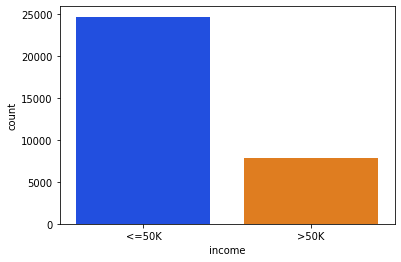

In [19]:
sn.countplot(df["income"],palette="bright")

In [20]:
df.describe(include=["object"]).T 

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
occupation,32561,15,Prof-specialty,4140
race,32561,5,White,27816
sex,32561,2,Male,21790
income,32561,2,<=50K,24720


In [21]:
df.groupby('income').size()

income
<=50K    24720
>50K      7841
dtype: int64

In [22]:
df.groupby('workclass').size()

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64

In [23]:
df.groupby('education').size()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64

In [24]:
df.groupby('hours.per.week').size()

hours.per.week
1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Length: 94, dtype: int64

In [25]:
df.groupby('race').size()

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64

In [26]:
df.groupby('sex').size()

sex
Female    10771
Male      21790
dtype: int64

In [27]:
df.head(1)

,age,workclass,fnlwgt,education,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,?,77053,HS-grad,9,?,White,Female,0,4356,40,<=50K


In [28]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

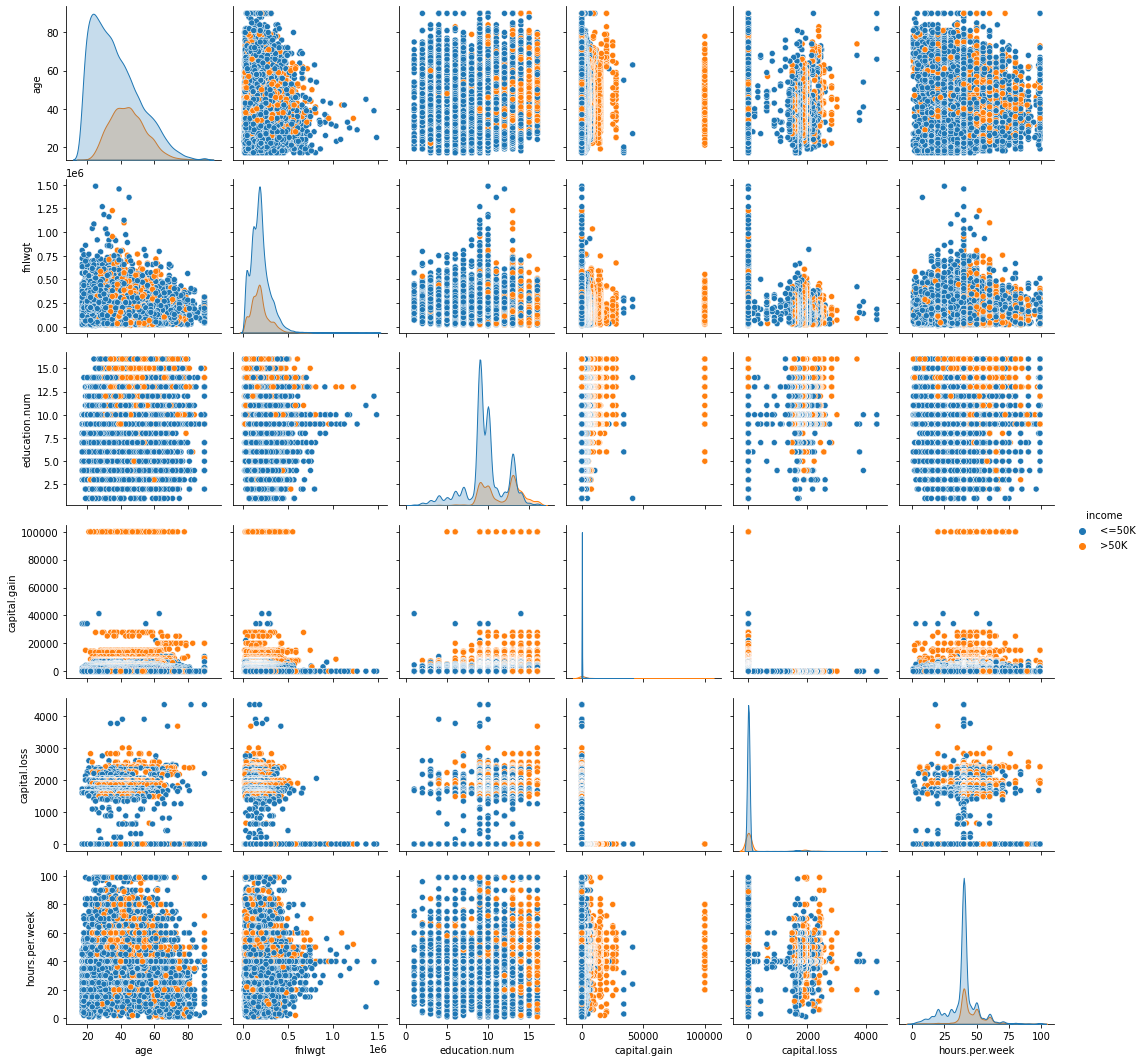

In [29]:
sn.pairplot(df, hue = 'income')

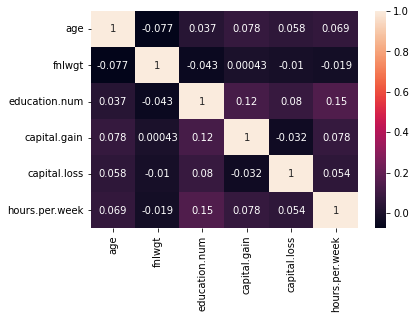

In [30]:
annot=True
sn.heatmap(df.corr(),annot=annot)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  income          32561 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [ ]:
df['hours.per.week'].fillna(df['hours.per.week'].median(), inplace = True)

In [ ]:
df['income'].fillna(df['income'].mode(), inplace = True)

In [ ]:
df.drop([24917], inplace = True)

In [ ]:
df.info()

# Deciding X and Y for Train & Test

In [32]:
x=df.drop('income',axis=1)

In [33]:
y=df['income']

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [35]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import category_encoders as ce

In [37]:
encoder = ce.OrdinalEncoder(cols=['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'occupation','race','sex','capital.gain','capital.loss','hours.per.week'])

In [38]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [39]:
x_train.head(10)

,age,workclass,fnlwgt,education,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week
21510,1,1,1,1,1,1,1,1,1,1,1
3866,2,1,2,1,1,2,1,2,2,1,2
6157,3,1,3,1,1,3,1,2,1,1,2
15142,4,1,4,2,2,2,2,2,1,1,2
14208,5,2,5,3,3,4,1,1,1,1,3
28120,6,1,6,4,4,2,1,1,1,1,2
22127,7,3,7,5,5,5,1,1,1,1,4
17513,8,1,8,6,6,6,2,1,1,1,5
16466,9,1,9,3,3,3,2,2,1,1,2
17263,10,1,10,1,1,7,2,1,1,1,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2030e65670>,
      dtype=object)

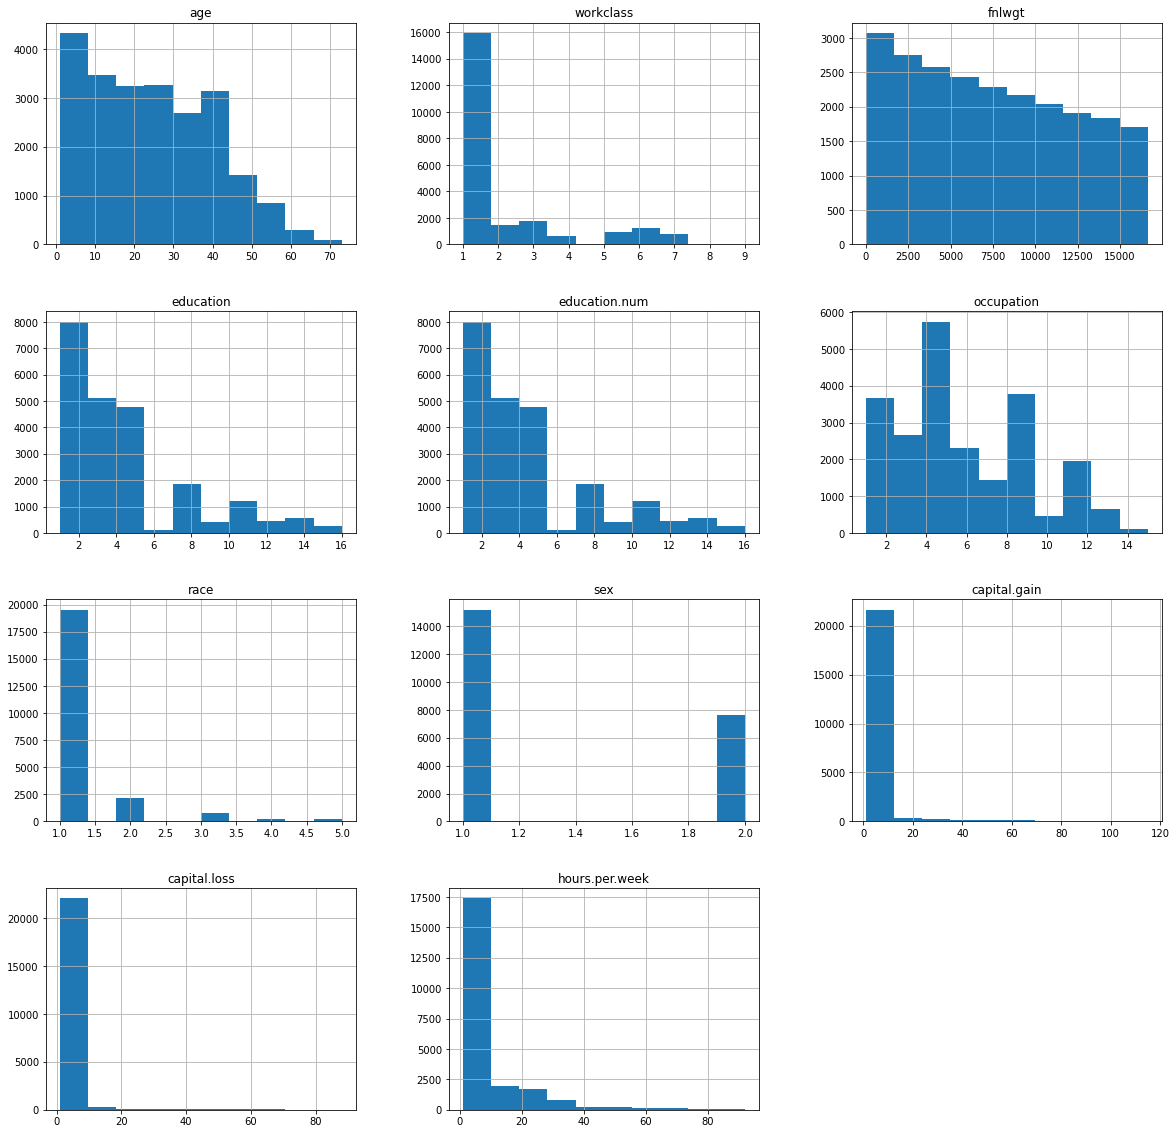

In [40]:
x_train.hist(figsize=(20,20))

In [41]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [42]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22792.0,24.585732,15.815515,1.0,11.00,23.0,37.00,73.0
workclass,22792.0,1.957002,1.744179,1.0,1.00,1.0,2.00,9.0
fnlwgt,22792.0,7459.433749,4780.479348,1.0,3263.75,7064.5,11442.25,16643.0
education,22792.0,4.215295,3.543722,1.0,1.00,3.0,5.00,16.0
education.num,22792.0,4.215295,3.543722,1.0,1.00,3.0,5.00,16.0
occupation,22792.0,5.913303,3.295002,1.0,3.00,5.0,9.00,15.0
race,22792.0,1.219068,0.622343,1.0,1.00,1.0,1.00,5.0
sex,22792.0,1.334108,0.471688,1.0,1.00,1.0,2.00,2.0
capital.gain,22792.0,3.244603,10.385913,1.0,1.00,1.0,1.00,115.0
capital.loss,22792.0,2.036285,6.286349,1.0,1.00,1.0,1.00,88.0


In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 21510 to 10933
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             22792 non-null  int64
 1   workclass       22792 non-null  int64
 2   fnlwgt          22792 non-null  int64
 3   education       22792 non-null  int64
 4   education.num   22792 non-null  int64
 5   occupation      22792 non-null  int64
 6   race            22792 non-null  int64
 7   sex             22792 non-null  int64
 8   capital.gain    22792 non-null  int64
 9   capital.loss    22792 non-null  int64
 10  hours.per.week  22792 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [44]:
x_train.tail(15)

,age,workclass,fnlwgt,education,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week
31229,63,6,16636,1,1,12,1,1,1,1,14
794,26,1,262,5,5,5,1,1,1,6,2
14043,23,5,2660,1,1,3,2,2,1,1,8
17466,3,1,16637,7,7,7,2,2,1,1,2
28830,13,6,5503,1,1,12,2,2,1,1,2
20446,46,1,16638,11,11,7,1,2,1,1,2
25111,16,3,6949,1,1,2,1,1,1,1,9
1178,52,1,14040,1,1,9,2,2,1,23,1
1344,26,1,16639,5,5,2,1,1,1,64,9
15697,7,3,4766,5,5,2,1,2,1,1,9


In [45]:
pd.isna(x_train)

,age,workclass,fnlwgt,education,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week
21510,False,False,False,False,False,False,False,False,False,False,False
3866,False,False,False,False,False,False,False,False,False,False,False
6157,False,False,False,False,False,False,False,False,False,False,False
15142,False,False,False,False,False,False,False,False,False,False,False
14208,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6055,False,False,False,False,False,False,False,False,False,False,False
14246,False,False,False,False,False,False,False,False,False,False,False
5390,False,False,False,False,False,False,False,False,False,False,False
22986,False,False,False,False,False,False,False,False,False,False,False


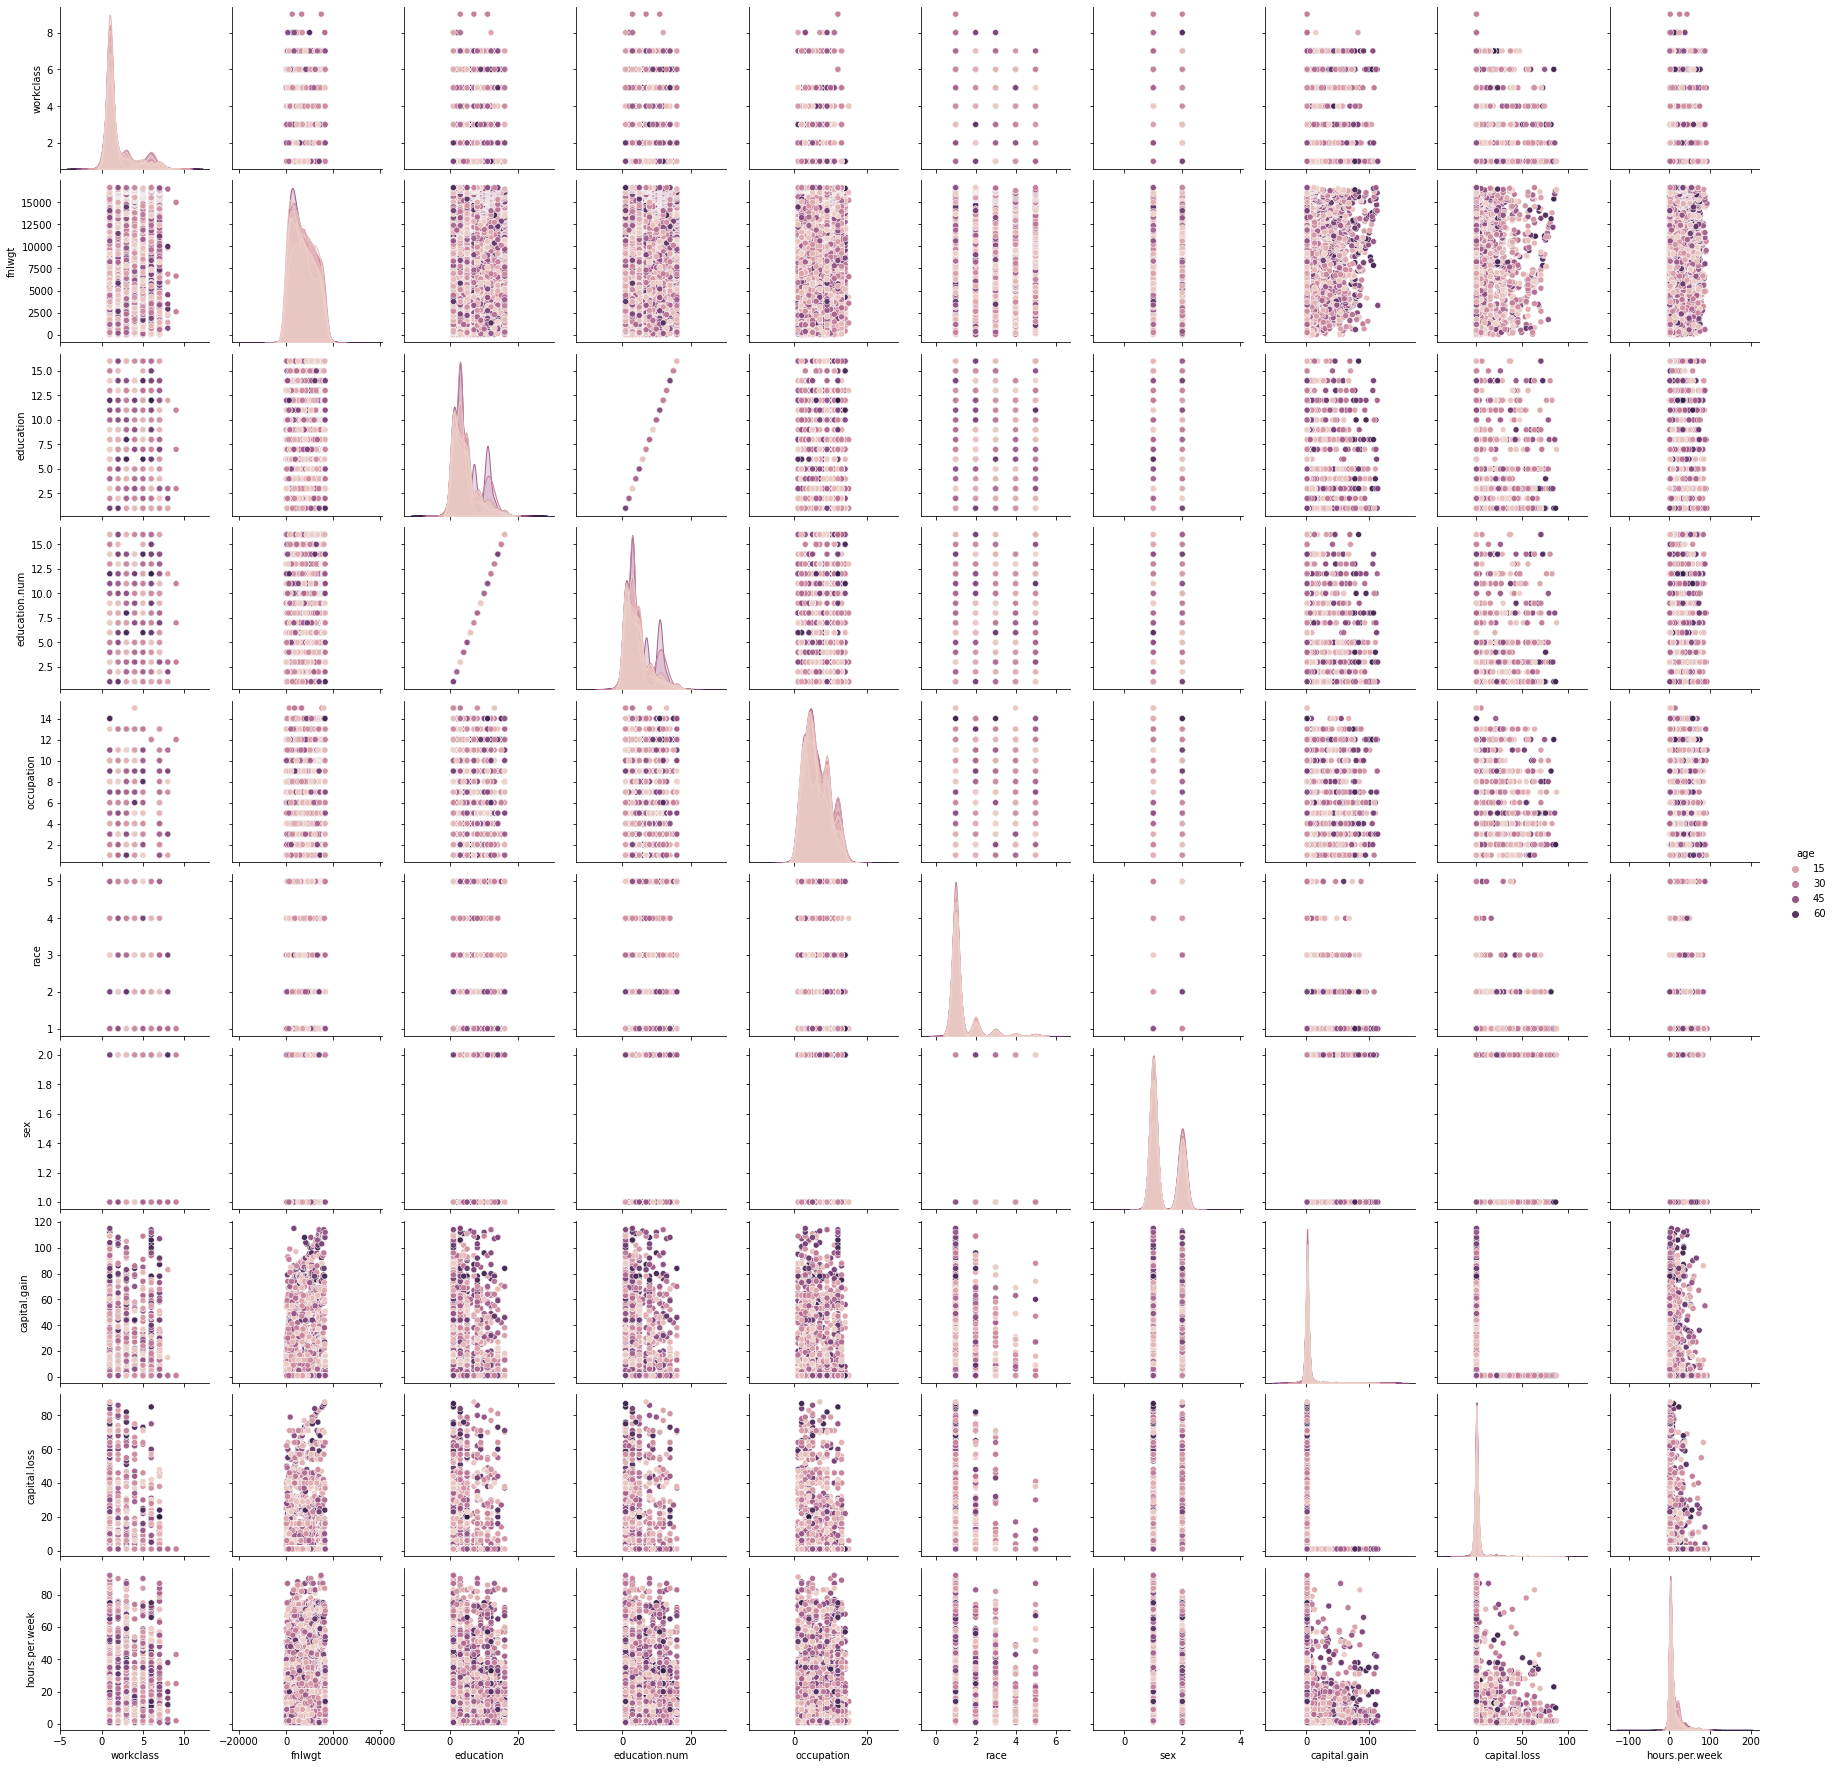

In [46]:
sn.pairplot(x_train, hue='age')

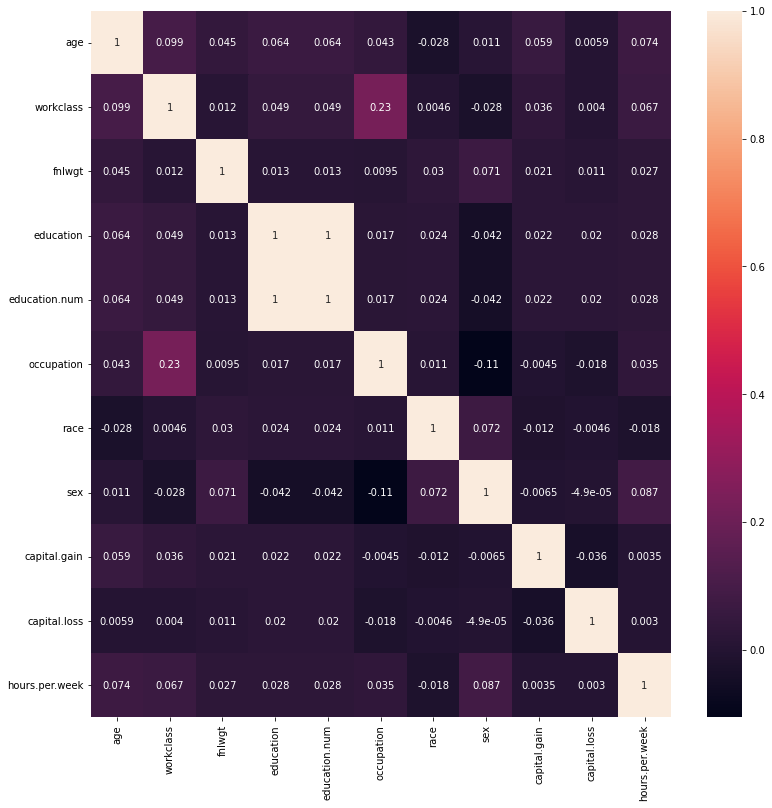

In [47]:
plt.figure(figsize=(13,13))
annot = True
sn.heatmap(x_train.corr(),annot=annot)

# Training a Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [51]:
predictions = dtree.predict(x_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       <=50K       0.84      0.79      0.82      7415
        >50K       0.45      0.54      0.49      2354

    accuracy                           0.73      9769
   macro avg       0.65      0.67      0.65      9769
weighted avg       0.75      0.73      0.74      9769



In [54]:
print(confusion_matrix(y_test,predictions))

[[5866 1549]
 [1084 1270]]


# Training the Random Forest model
Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=600)

In [57]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

# Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.

In [58]:
predictions = rfc.predict(x_test)

Now create a classification report from the results. Do you get anything

strange or some sort of warning?**

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      7415
        >50K       0.65      0.46      0.54      2354

    accuracy                           0.81      9769
   macro avg       0.75      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769



# Show the Confusion Matrix for the predictions.

In [61]:
print(confusion_matrix(y_test,predictions))

[[6841  574]
 [1279 1075]]


# instantiate the DecisionTreeClassifier model with criterion gini index

[Text(0.5, 0.875, 'X[8] <= 3.5\ngini = 0.366\nsamples = 22792\nvalue = [17305, 5487]'),
 Text(0.25, 0.625, 'X[7] <= 1.5\ngini = 0.327\nsamples = 20882\nvalue = [16585, 4297]'),
 Text(0.125, 0.375, 'X[5] <= 5.5\ngini = 0.392\nsamples = 13704\nvalue = [10030, 3674]'),
 Text(0.0625, 0.125, 'gini = 0.477\nsamples = 6466\nvalue = [3919, 2547]'),
 Text(0.1875, 0.125, 'gini = 0.263\nsamples = 7238\nvalue = [6111, 1127]'),
 Text(0.375, 0.375, 'X[5] <= 5.5\ngini = 0.159\nsamples = 7178\nvalue = [6555, 623]'),
 Text(0.3125, 0.125, 'gini = 0.21\nsamples = 4342\nvalue = [3825, 517]'),
 Text(0.4375, 0.125, 'gini = 0.072\nsamples = 2836\nvalue = [2730, 106]'),
 Text(0.75, 0.625, 'X[8] <= 27.5\ngini = 0.47\nsamples = 1910\nvalue = [720, 1190]'),
 Text(0.625, 0.375, 'X[5] <= 5.5\ngini = 0.313\nsamples = 1222\nvalue = [237, 985]'),
 Text(0.5625, 0.125, 'gini = 0.227\nsamples = 865\nvalue = [113, 752]'),
 Text(0.6875, 0.125, 'gini = 0.453\nsamples = 357\nvalue = [124, 233]'),
 Text(0.875, 0.375, 'X[8] <

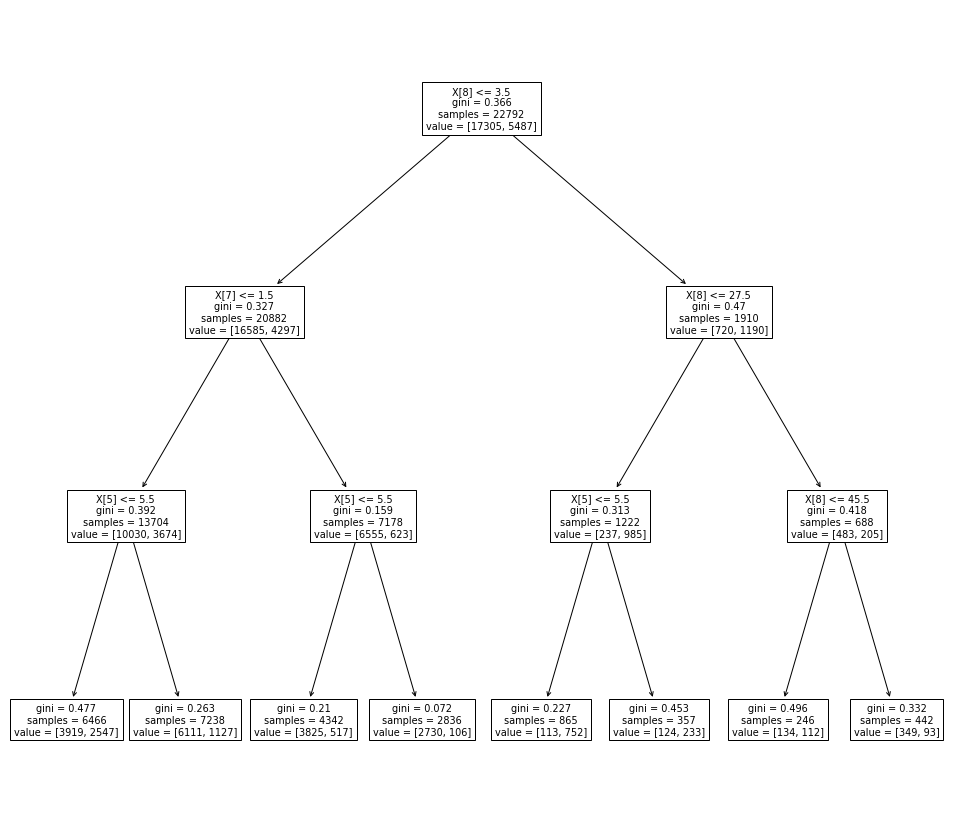

In [67]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(17,15))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

# instantiate the DecisionTreeClassifier model with criterion entropy

[Text(0.5, 0.875, 'X[8] <= 3.5\nentropy = 0.796\nsamples = 22792\nvalue = [17305, 5487]'),
 Text(0.25, 0.625, 'X[7] <= 1.5\nentropy = 0.733\nsamples = 20882\nvalue = [16585, 4297]'),
 Text(0.125, 0.375, 'X[5] <= 5.5\nentropy = 0.839\nsamples = 13704\nvalue = [10030, 3674]'),
 Text(0.0625, 0.125, 'entropy = 0.967\nsamples = 6466\nvalue = [3919, 2547]'),
 Text(0.1875, 0.125, 'entropy = 0.624\nsamples = 7238\nvalue = [6111, 1127]'),
 Text(0.375, 0.375, 'X[5] <= 5.5\nentropy = 0.426\nsamples = 7178\nvalue = [6555, 623]'),
 Text(0.3125, 0.125, 'entropy = 0.527\nsamples = 4342\nvalue = [3825, 517]'),
 Text(0.4375, 0.125, 'entropy = 0.23\nsamples = 2836\nvalue = [2730, 106]'),
 Text(0.75, 0.625, 'X[8] <= 27.5\nentropy = 0.956\nsamples = 1910\nvalue = [720, 1190]'),
 Text(0.625, 0.375, 'X[5] <= 5.5\nentropy = 0.71\nsamples = 1222\nvalue = [237, 985]'),
 Text(0.5625, 0.125, 'entropy = 0.559\nsamples = 865\nvalue = [113, 752]'),
 Text(0.6875, 0.125, 'entropy = 0.932\nsamples = 357\nvalue = [124,

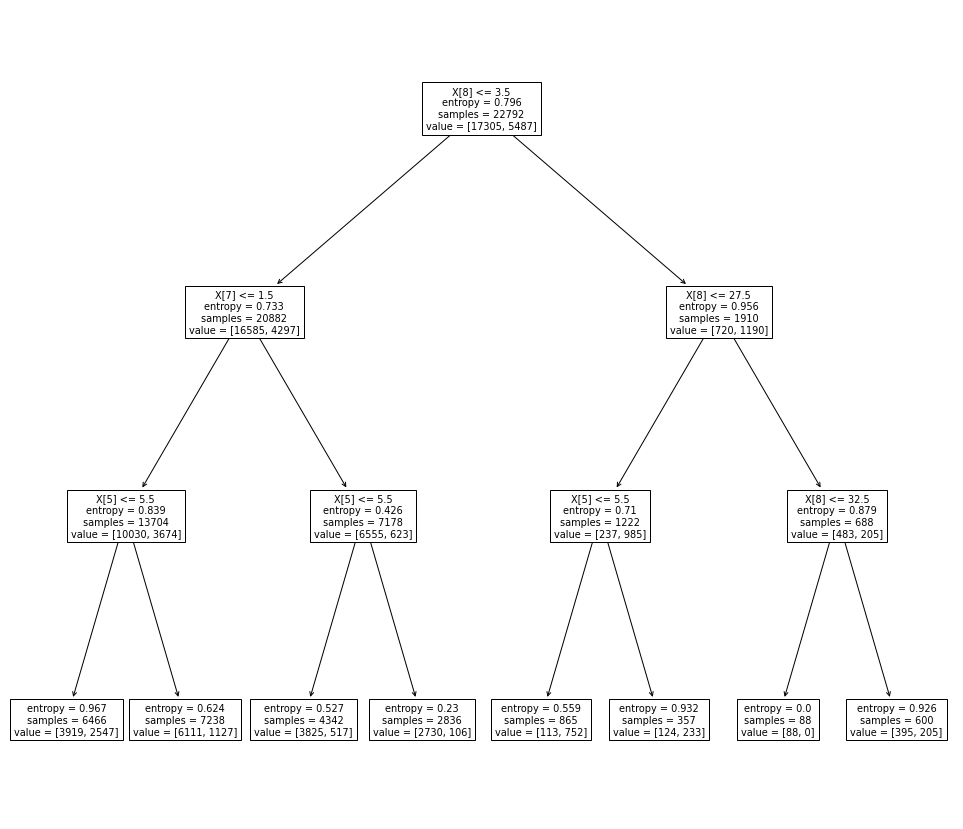

In [66]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
plt.figure(figsize=(17,15))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train)) 
